# Hands-on altimetry tutorial
## 2. Basic analysis

### Laura Gómez Navarro
IMEDEA (UIB-CSIC) and Utrecht University

email: laura.gomez@uib.es

### Paul Hargous
IMEDEA (UIB-CSIC)

email: hargous@imedea.uib-csic.es

# Index

1) Reading the data

2) Selecting a region

3) Visualizing the data after removing a spatial mean

4) Temporal series of a point

5) Spatial statistics

6) Temporal statistics

7) Masking certain values

In [ ]:
!pip install cartopy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import xarray as xr
from glob import glob


We will use the interpolated gridded data (L4 products).

# 1) Reading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# We define the file direcory where we have the data stored:
filedir = '../content/drive/MyDrive/Altimetry/L4/'

In [ ]:
# We obtain the list of files:
## DT (processed data):
nfiles_L4_dt = sorted(glob(filedir + 'dt_europe_allsat_phy_l4_*.nc'))

In [ ]:
# We can also read all the daily data files at once using the open_mfdataset function (mf = multiple files):
ds_all = xr.open_mfdataset(nfiles_L4_dt)

In [ ]:
ds_all

<xarray.Dataset> Size: 2GB
Dimensions:         (time: 89, latitude: 370, nv: 2, longitude: 578)
Coordinates:
  * time            (time) datetime64[ns] 712B 2023-02-01 ... 2023-04-30
  * latitude        (latitude) float32 1kB 19.94 20.06 20.19 ... 65.94 66.06
  * longitude       (longitude) float32 2kB -30.06 -29.94 -29.81 ... 41.94 42.06
  * nv              (nv) int32 8B 0 1
Data variables: (12/14)
    crs             (time) int32 356B -2147483647 -2147483647 ... -2147483647
    lat_bnds        (time, latitude, nv) float32 263kB dask.array<chunksize=(1, 50, 2), meta=np.ndarray>
    lon_bnds        (time, longitude, nv) float32 412kB dask.array<chunksize=(1, 50, 2), meta=np.ndarray>
    sla             (time, latitude, longitude) float64 152MB dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    err_sla         (time, latitude, longitude) float64 152MB dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    ugosa           (time, latitude, longitude) float64 152MB dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    ...              ...
    err_vgosa       (time, latitude, longitude) float64 152MB dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    adt             (time, latitude, longitude) float64 152MB dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    ugos            (time, latitude, longitude) float64 152MB dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    vgos            (time, latitude, longitude) float64 152MB dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    tpa_correction  (time) float64 712B dask.array<chunksize=(1,), meta=np.ndarray>
    flag_ice        (time, latitude, longitude) float64 152MB dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2023-02-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2023-01-31T12:00:00Z
    title:                           DT merged all satellites European Seas G...

# 2)  Selecting a region

We choose the western Mediterranean:

In [ ]:
min_lon = -2.
max_lon = 10.
min_lat = 36.
max_lat = 44.

zona_coords = [min_lon, max_lon, min_lat, max_lat]

In [ ]:
ds_sub = ds_all.where((ds_all['longitude'] < zona_coords[1]) & (ds_all['longitude'] > zona_coords[0]) &
                              (ds_all['latitude'] < zona_coords[3]) & (ds_all['latitude'] > zona_coords[2]), drop=True)


Starting region:

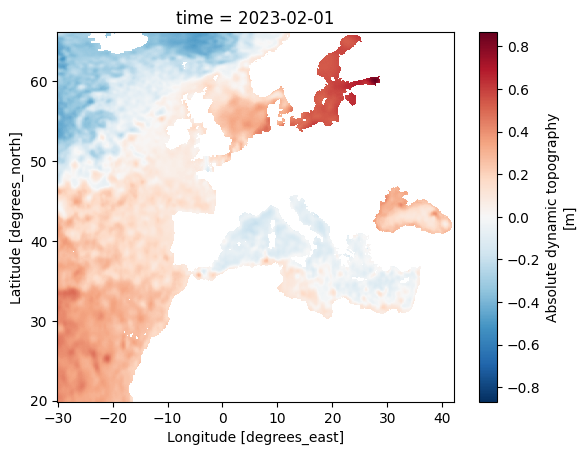

In [ ]:
ds_all.adt[0,:,:].plot();

Selected region:

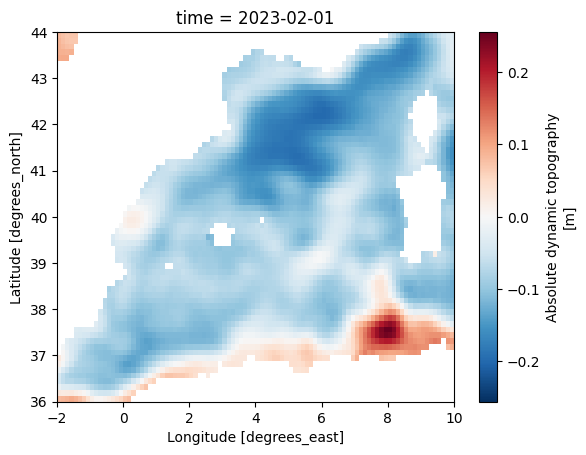

In [ ]:
ds_sub.adt[0,:,:].plot();

We can observe the Algerian Current in the south as a strong ADT gradient, and an eddy in the southeast area.

# 3) Visualizing the data after removing a spatial mean

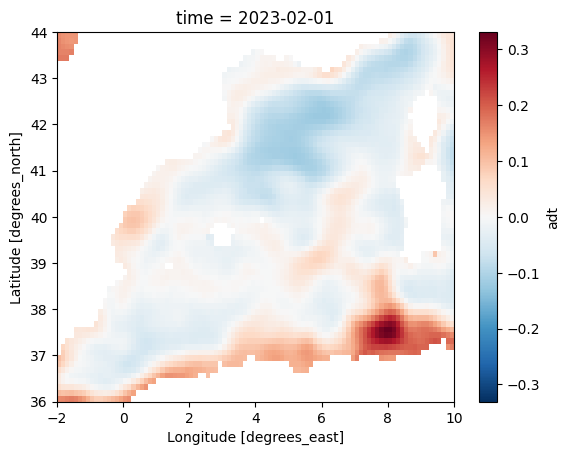

In [ ]:
( ds_sub.adt[0,:,:] - ds_sub.adt[0,:,:].mean() ).plot()

# 4) Temporal series of a point

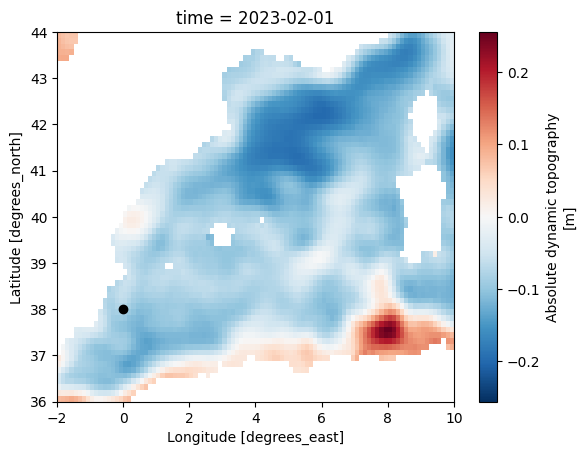

In [ ]:
lon01 = 0.
lat01 = 38.

ds_sub.adt[0,:,:].plot();
plt.scatter(lon01, lat01, c='k')

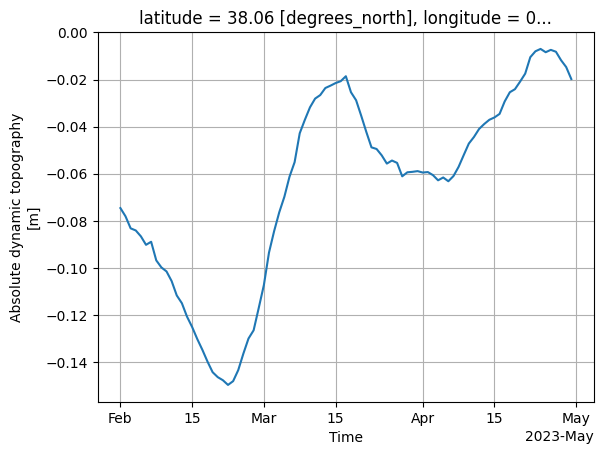

In [ ]:
ds_sub.adt.sel(latitude=lat01, longitude=lon01, method='nearest').plot()
plt.grid()

Several points:

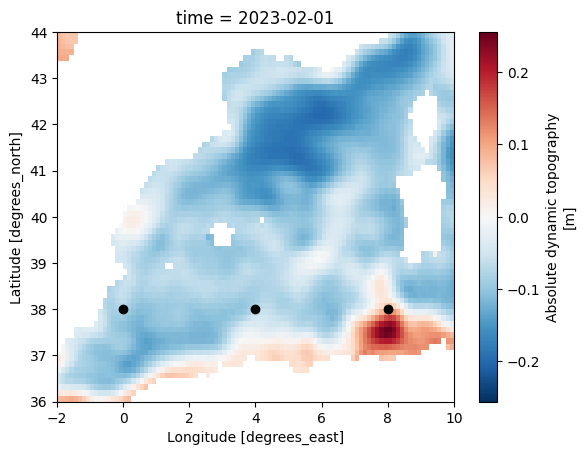

In [ ]:
lon02 = 4.
lon03 = 8.

ds_sub.adt[0,:,:].plot();
plt.scatter([lon01, lon02, lon03], [lat01, lat01, lat01], c='k')

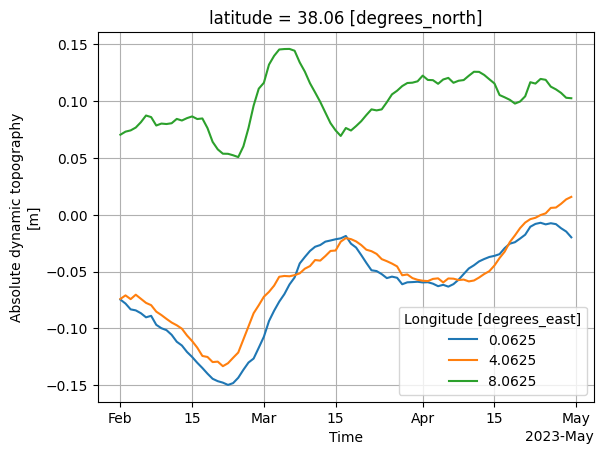

In [ ]:
ds_sub.adt.sel(latitude=lat01, longitude=[lon01, lon02, lon03], method='nearest').plot.line(x="time")
plt.grid()


# 5) Spatial statistics

We calculate the mean:

Text(0, 0.5, 'ADT [m]')

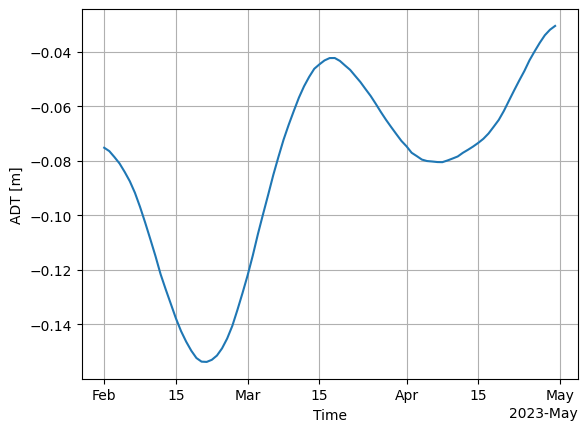

In [ ]:
ds_sub.adt.mean(axis=[1,2]).plot()
plt.grid()
plt.ylabel('ADT [m]')


Now we calculate the minimum and maximim value to see it is variability in time:

Text(0, 0.5, 'ADT [m]')

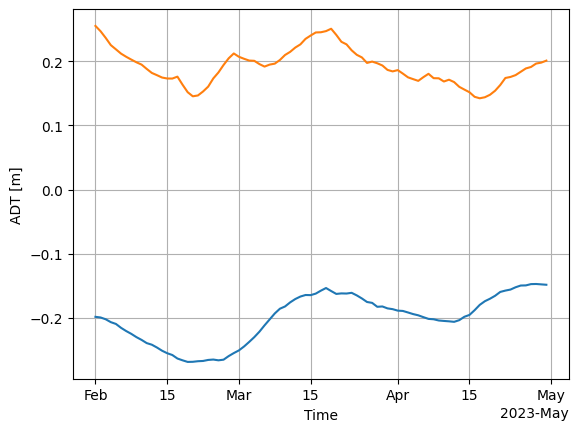

In [ ]:
ds_sub.adt.min(axis=[1,2]).plot()
ds_sub.adt.max(axis=[1,2]).plot()
plt.grid()
plt.ylabel('ADT [m]')

# 6) Temporal statistics

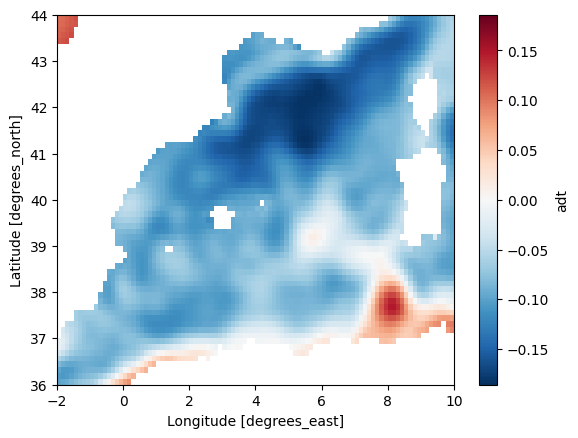

In [ ]:
# Temporal mean:
ds_sub.adt.mean(axis=[0]).plot()

/usr/local/lib/python3.10/dist-packages/dask/array/numpy_compat.py:56: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


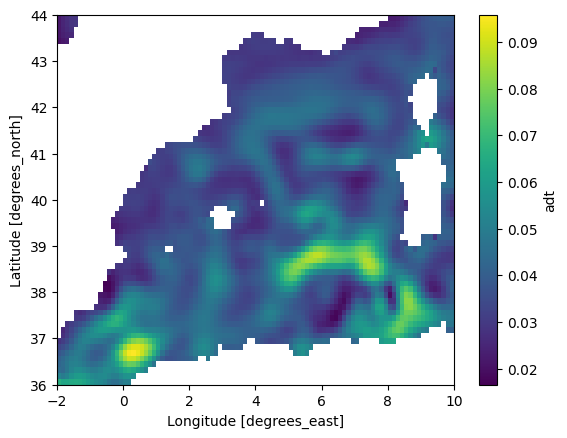

In [ ]:
# # Temporal standard deviation:
ds_sub.adt.std(axis=[0]).plot()

We can observe higher values where there are more eddies.

# 7) Masking certain values

Let's imagine we do not want to take into account the data points that have a high associated error.  For that, we have the err_sla variable we can use:

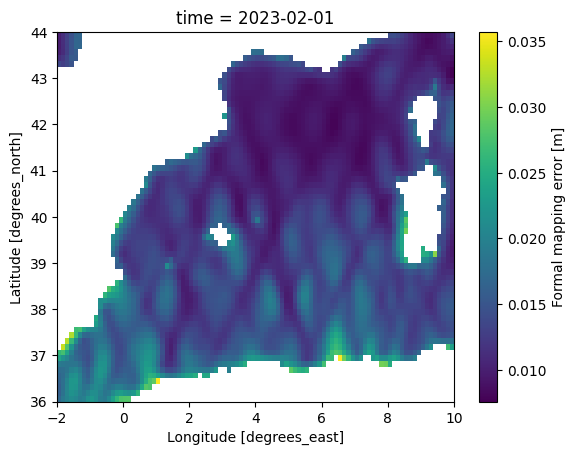

In [ ]:
ds_sub.err_sla[0,:,:].plot()

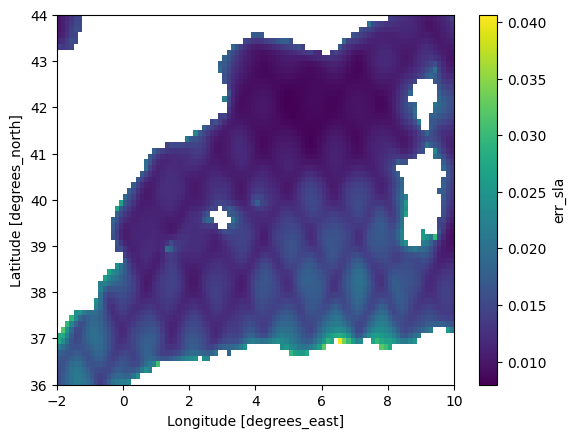

In [ ]:
# The mean value in time is:
ds_sub.err_sla.mean(axis=[0]).plot()

We can decide to not keep the data points with an error greater than a certain value. We can do it in the following way:

In [ ]:
# We will only keep the data points with an associated error less than 0.025 m :
ds_sub_err = ds_sub.where(ds_sub.err_sla < 0.025)#, drop=True)

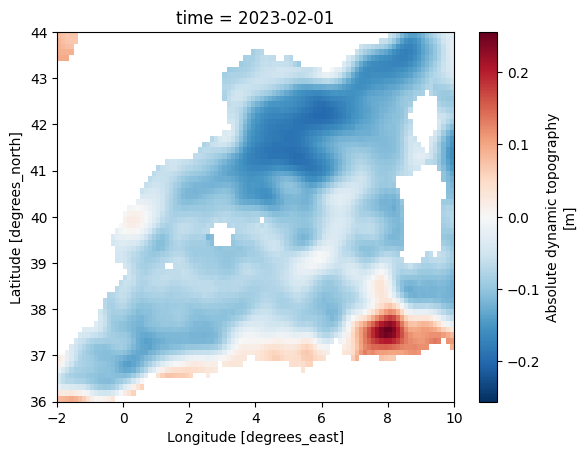

In [ ]:
# We plot now the ADT with the new mask:
ds_sub_err.adt[0,:,:].plot()

We can observe now that th islands of Menorca and Eivissa are masked (at the resolution of the dataset).

We compare this with the previous plot, zooming into the North African coast:

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


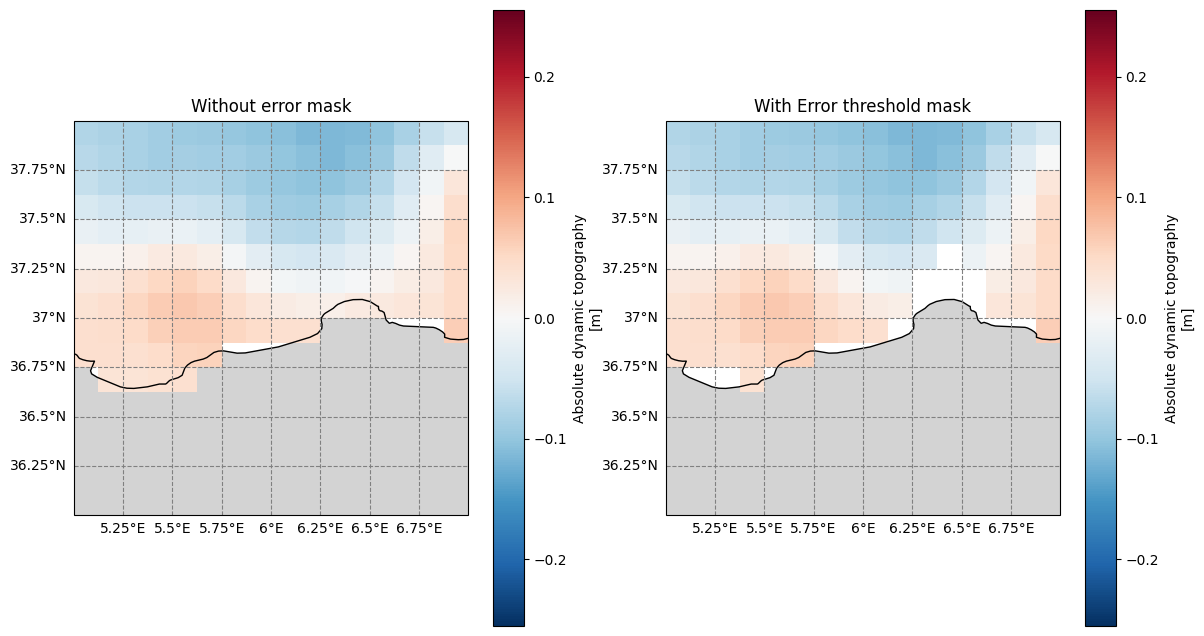

In [ ]:
plt.figure(figsize=(14,8))
ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.add_feature(cartopy.feature.LAND, facecolor='lightgrey')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', color='gray')
gl.top_labels = gl.right_labels = False  # Disable top and right labels

ds_sub.adt[0,:,:].plot(transform=ccrs.PlateCarree())
plt.ylim([36, 38])
plt.xlim([5, 7])
plt.title('Without error mask')

ax2 = plt.subplot(122, projection=ccrs.PlateCarree())
ax2.coastlines()
ax2.add_feature(cartopy.feature.LAND, facecolor='lightgrey')
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', color='gray')
gl.top_labels = gl.right_labels = False  # Disable top and right labels

ds_sub_err.adt[0,:,:].plot()
plt.ylim([36, 38])
plt.xlim([5, 7])
plt.title('With Error threshold mask')

plt.show()


We can see how at the mainland coast, some points are masked now too.